In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

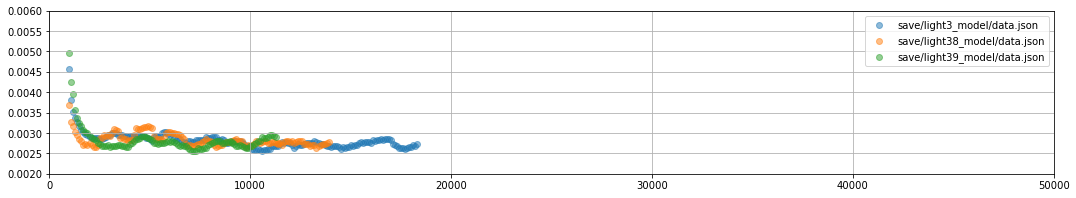

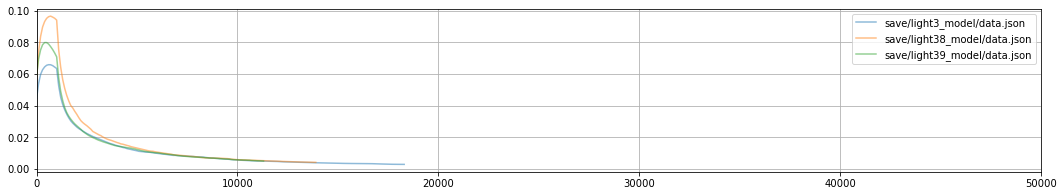

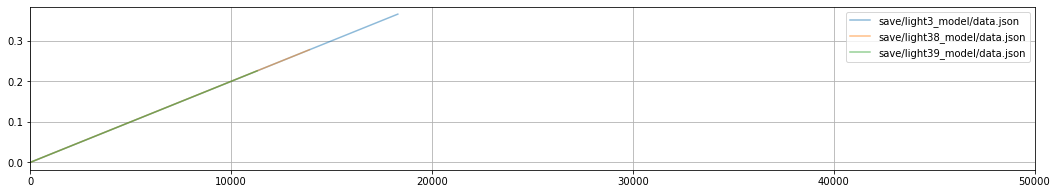

In [371]:
dirs = ['save/light3_model/data.json',
        'save/light38_model/data.json',
        'save/light39_model/data.json',
       ]

N = 50000

loss_list = []
for dir in dirs:
    with open(dir, 'r') as f:
        loss = np.array(json.load(f)['recon_loss'])
        loss[:, 1] = np.clip(loss[:, 1], a_min=0, a_max=2.0)
        loss_list.append(loss)
    
def moving_average(data_set, periods=10):
    weights = np.ones(periods) / periods
    data_set = np.pad(data_set, (periods-1, 0), mode='edge')
    return np.convolve(data_set, weights, mode='valid')

plt.figure(figsize=[18, 3])
for dir, loss in zip(dirs, loss_list):
    plt.scatter(loss[:, 0], moving_average(loss[:, 1]), label=dir, alpha=0.5)
    
plt.xlim([0, N])
plt.ylim([0.002, 0.006])
plt.grid()
plt.legend()
plt.show()

loss_list = []
for dir in dirs:
    with open(dir, 'r') as f:
        loss = np.array(json.load(f)['kl_loss'])
        loss[:, 1] = np.clip(loss[:, 1], a_min=0, a_max=2.0)
        loss_list.append(loss)
    
plt.figure(figsize=[18, 3])
for dir, loss in zip(dirs, loss_list):
    plt.plot(loss[:, 0], moving_average(loss[:, 1]), label=dir, alpha=0.5)
    
plt.xlim([0, N])
#plt.ylim([0.00, 0.01])
plt.grid()
plt.legend()
plt.show()

loss_list = []
for dir in dirs:
    with open(dir, 'r') as f:
        loss = np.array(json.load(f)['beta'])
        loss[:, 1] = np.clip(loss[:, 1], a_min=0, a_max=2.0)
        loss_list.append(loss)
    
plt.figure(figsize=[18, 3])
for dir, loss in zip(dirs, loss_list):
    plt.plot(loss[:, 0], loss[:, 1], label=dir, alpha=0.5)
    
plt.xlim([0, N])
#plt.ylim([0.0, 1.1])
plt.grid()
plt.legend()
plt.show()

In [14]:
!ls save

light_model  normal_model
